## Analysis of Fine Tuning Runs

Analysis and charts to interpret the output from the second run to fine tune - this time with balanced training data 


In [1]:
###  Add mathematical libraries
import numpy as np
import pandas as pd

# Graphical libraries and items.
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots, draw


import re
# import json
# import datetime
# import string


In [2]:
## Read file into Pandas Data array

file_loc = "./runs2bal.log"

df = pd.read_csv(file_loc, sep='|', skiprows=(), header=(0))

df.columns

Index(['timestamp', 'max_len', 'epochs', 'batch_size', 'embed_dim',
       'num_filters', 'kernel_sizes', 'dense_layer_dims', 'dropout_rate',
       'loss', 'loss-0', 'loss-1', 'loss-2', 'loss-3', 'loss-4', 'loss-5',
       'loss-6', 'loss-7', 'loss-8', 'loss-9', 'loss-10', 'loss-11', 'loss-12',
       'loss-13', 'loss-14', 'loss-15', 'loss-16', 'loss-17', 'loss-18',
       'loss-19', 'accuracy', 'accuracy-0', 'accuracy-1', 'accuracy-2',
       'accuracy-3', 'accuracy-4', 'accuracy-5', 'accuracy-6', 'accuracy-7',
       'accuracy-8', 'accuracy-9', 'accuracy-10', 'accuracy-11', 'accuracy-12',
       'accuracy-13', 'accuracy-14', 'accuracy-15', 'accuracy-16',
       'accuracy-17', 'accuracy-18', 'accuracy-19', 'val_loss', 'val_loss-0',
       'val_loss-1', 'val_loss-2', 'val_loss-3', 'val_loss-4', 'val_loss-5',
       'val_loss-6', 'val_loss-7', 'val_loss-8', 'val_loss-9', 'val_loss-10',
       'val_loss-11', 'val_loss-12', 'val_loss-13', 'val_loss-14',
       'val_loss-15', 'val_loss-16

In [3]:
### Find max accuracy and min loss on training and
### validation sets, and which epoch it was achieved on
### This will let us see both the most accurate runs
### and let us detect if (a) convergence has occurred
### and (b) whether we have overfit the model

epochs = 20  #output columns are counted from 0

### Metrics are tuples of the metric name and + or -1
### depending whether low or high numbers are best

for metric in [ ('loss', -1), ('accuracy',1), ('val_loss',-1), ('val_accuracy',1)]:
    best_val     = f"{metric[0]}-best"
    best_epc = f"{metric[0]}-epoch"
    met_sign     = metric[1]
    
    # Create list of the column names we want to check for the metric
    metric_cols  = [ f"{metric[0]}-{epoch}" for epoch in range(0,epochs) ]
   

    # for some reason, pd.read_csv is interpreting 


    # Find the best value for each metric, as well as the epoch in which it occurred
    #
    # idxmax(axis=1) returns the column name with the maximum value, idxmin does
    # the sames for the minimum
    #
    # The str.extract() turns the values into strings and then pulls out only digits
    # Ordinarily this would also pull separators like "," and "." as well, but
    # we don't have them in the column names.
    
    if met_sign == 1:
        df[best_val] = df[metric_cols].max(axis=1)
        df[best_epc] = df[metric_cols].idxmax(axis=1).str.extract('(\d+)').astype(int)
    else:
        df[best_val] = df[metric_cols].min(axis=1)
        df[best_epc] = df[metric_cols].idxmin(axis=1).str.extract('(\d+)').astype(int)
        

    
    

In [4]:
temp_cols = metric_cols.copy()

temp_cols.append(best_val)
temp_cols.append(best_epc)
# df[temp_cols]
# type(best_val)



## Review Results by each of the hyperparameters we are varying

Unless otherwise stated, we will be measuring loss and accuracy for the validation data set.


In [5]:
### Top values
### Absolute best value
df.sort_values('val_accuracy-best', ascending=False)[:8]

,timestamp,max_len,epochs,batch_size,embed_dim,num_filters,kernel_sizes,dense_layer_dims,dropout_rate,loss,...,val_accuracy-19,END,loss-best,loss-epoch,accuracy-best,accuracy-epoch,val_loss-best,val_loss-epoch,val_accuracy-best,val_accuracy-epoch
62,210401-214116,100,20,50,50,"[64, 64, 64]","[4, 8, 16]",[32],0.2,loss,...,0.934901,END,0.004648,12,0.998748,12,0.097533,5,0.973327,5
119,210401-221620,100,20,50,50,"[128, 128, 128, 128]","[4, 8, 16, 32]","[32, 16]",0.2,loss,...,0.971971,END,0.002327,19,0.999165,17,0.150097,7,0.971971,19
77,210401-214959,100,20,50,50,"[64, 64, 64]","[8, 12, 16]",[16],0.2,loss,...,0.903255,END,0.003961,19,0.998817,17,0.122303,8,0.971971,8
8,210401-211037,100,20,50,50,"[32, 32]","[8, 16]",[8],0.2,loss,...,0.872061,END,0.007884,15,0.997495,16,0.136210,17,0.971971,17
91,210401-215816,100,20,50,50,"[32, 32, 32]","[8, 16, 32]","[32, 16]",0.2,loss,...,0.971519,END,0.006907,18,0.997913,18,0.156866,4,0.971519,19
78,210401-215036,100,20,50,50,"[64, 64, 64]","[8, 12, 16]",[32],0.2,loss,...,0.929024,END,0.003052,16,0.999513,16,0.107382,3,0.971067,9
117,210401-221454,100,20,50,50,"[128, 128, 128, 128]","[4, 8, 16, 32]",[16],0.2,loss,...,0.927215,END,0.001629,19,0.999513,19,0.121239,9,0.969259,9
57,210401-213816,100,20,50,50,"[32, 32, 32]","[4, 8, 16]",[16],0.2,loss,...,0.929928,END,0.006507,18,0.998678,18,0.137481,11,0.968807,11


### Look at the effect of the convolutional filters

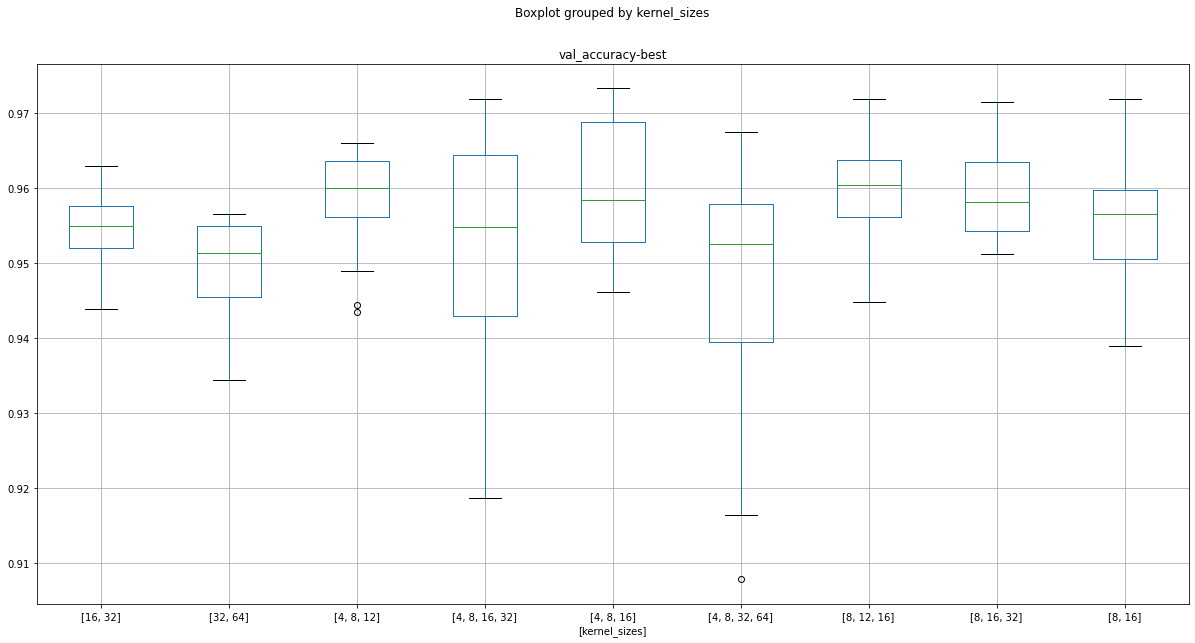

In [6]:
boxplot = df.boxplot(column=["val_accuracy-best"], by=['kernel_sizes'], figsize=(20,10))

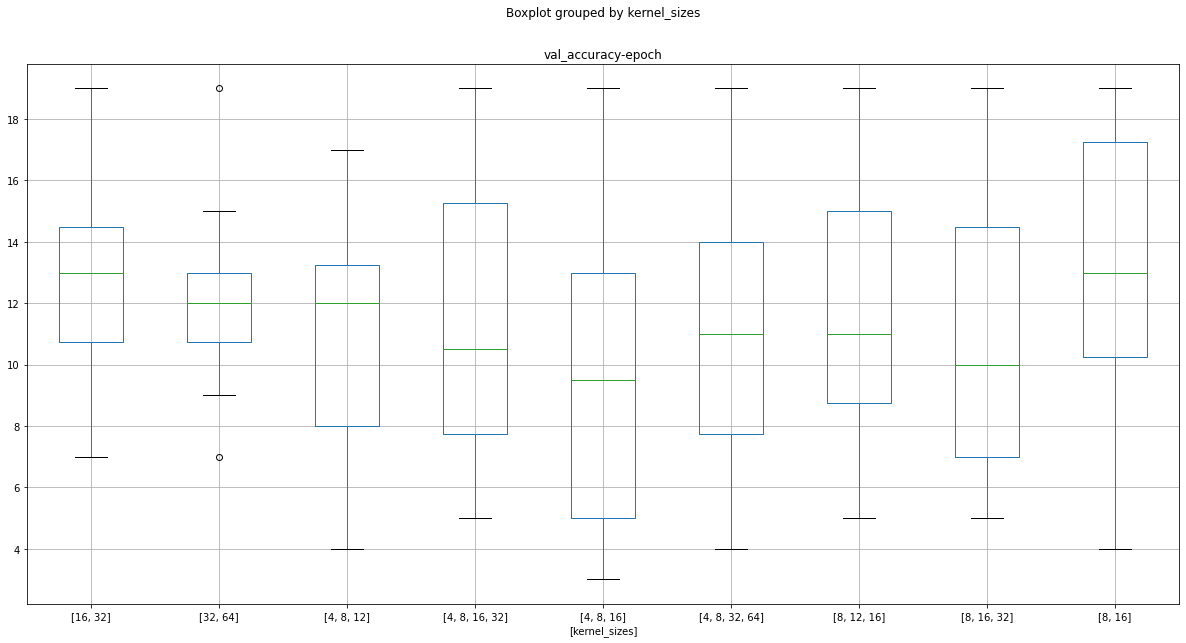

In [7]:
boxplot = df.boxplot(column=["val_accuracy-epoch"], by=['kernel_sizes'], figsize=(20,10))


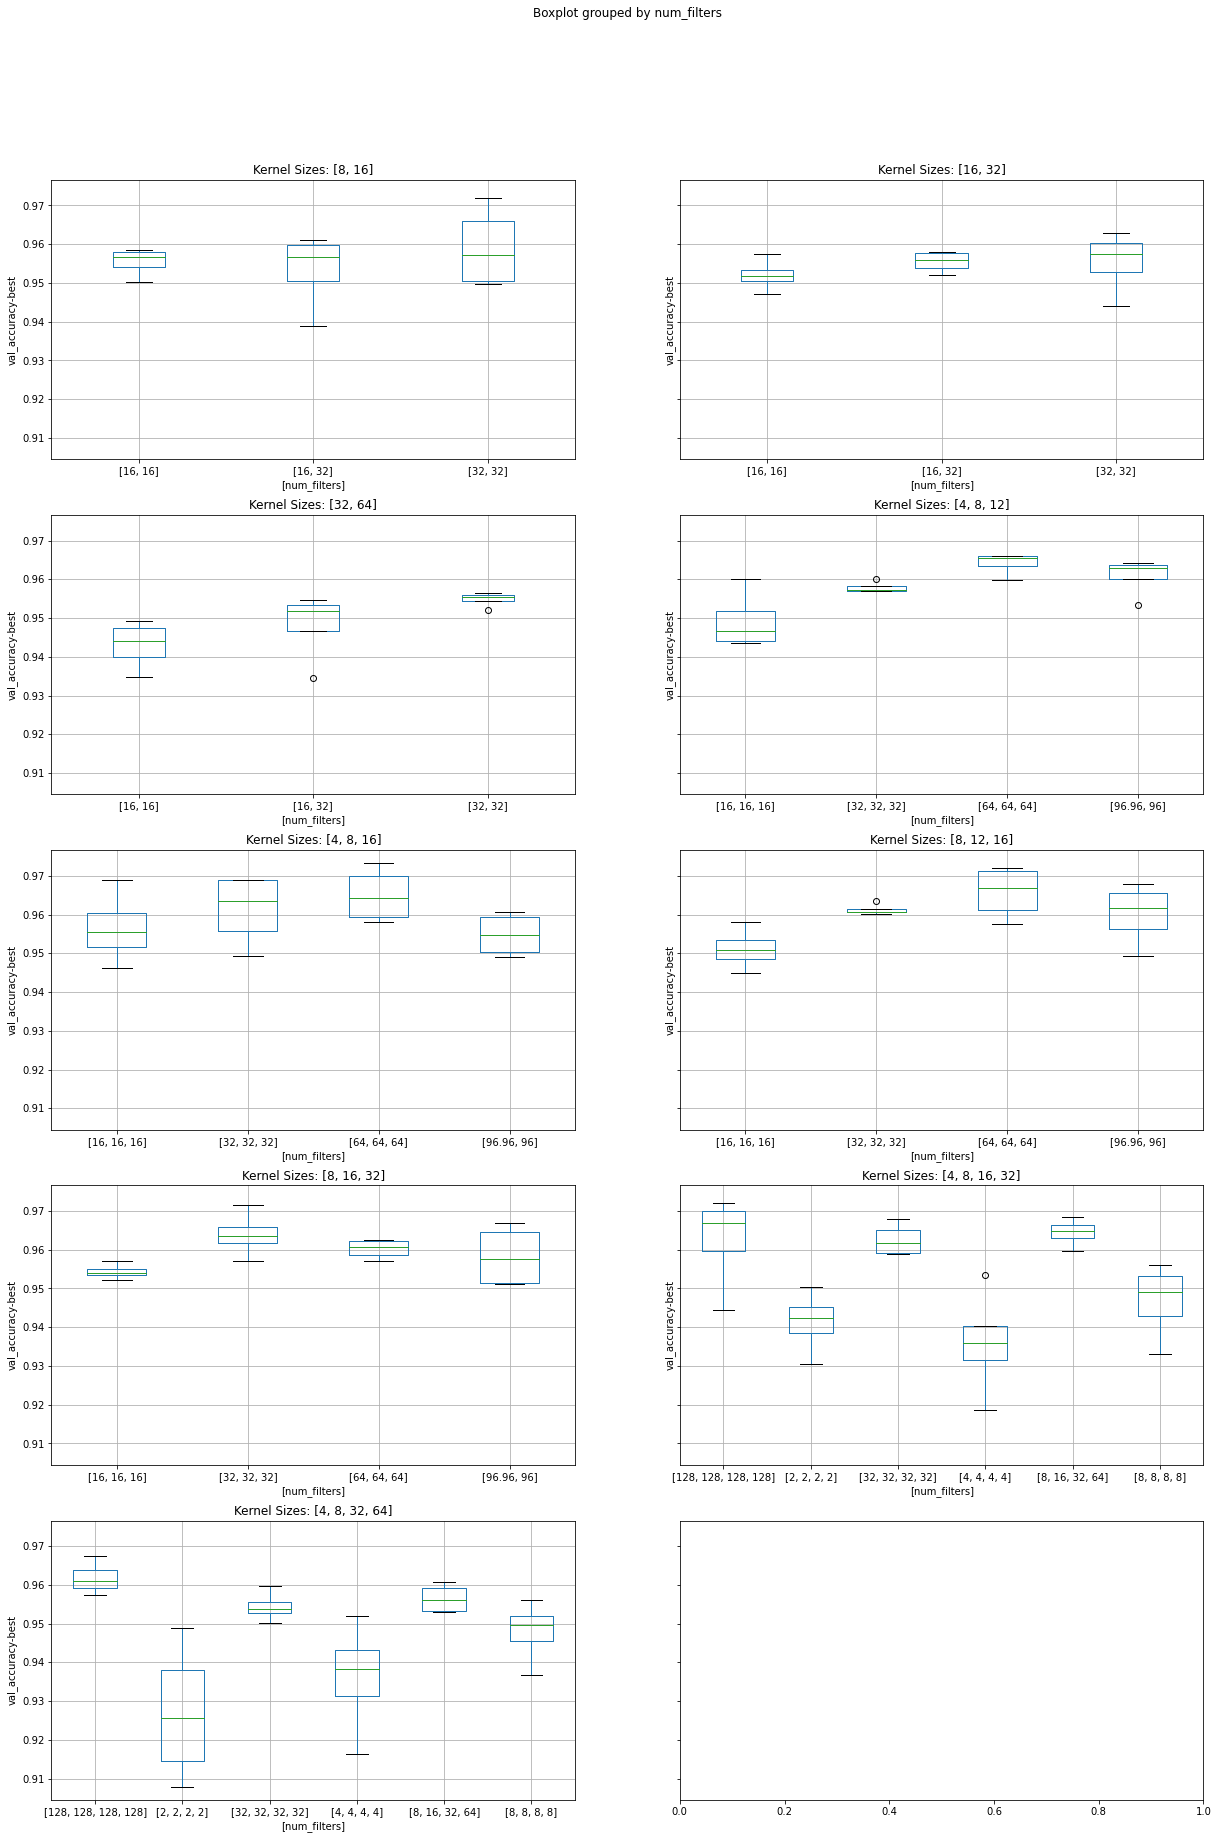

In [8]:
# look at each set of kernel sizes by their counts

kernels = df.kernel_sizes.unique()

# create 3-wide subplots to show
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(20, 30), sharey=True)

for i in range(0,len(kernels)):
      
    x = i // 2
    y = i % 2
    
    axis = ax[x,y]
    
    axis.set_ylabel("val_accuracy-best")

    # plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
    boxplot = df[df.kernel_sizes == kernels[i]].boxplot(column=["val_accuracy-best"],
                                                          by=['num_filters'],
                                                          ax=axis,
                                                          figsize=(20,10))
    axis.title.set_text(f"Kernel Sizes: {kernels[i]}")


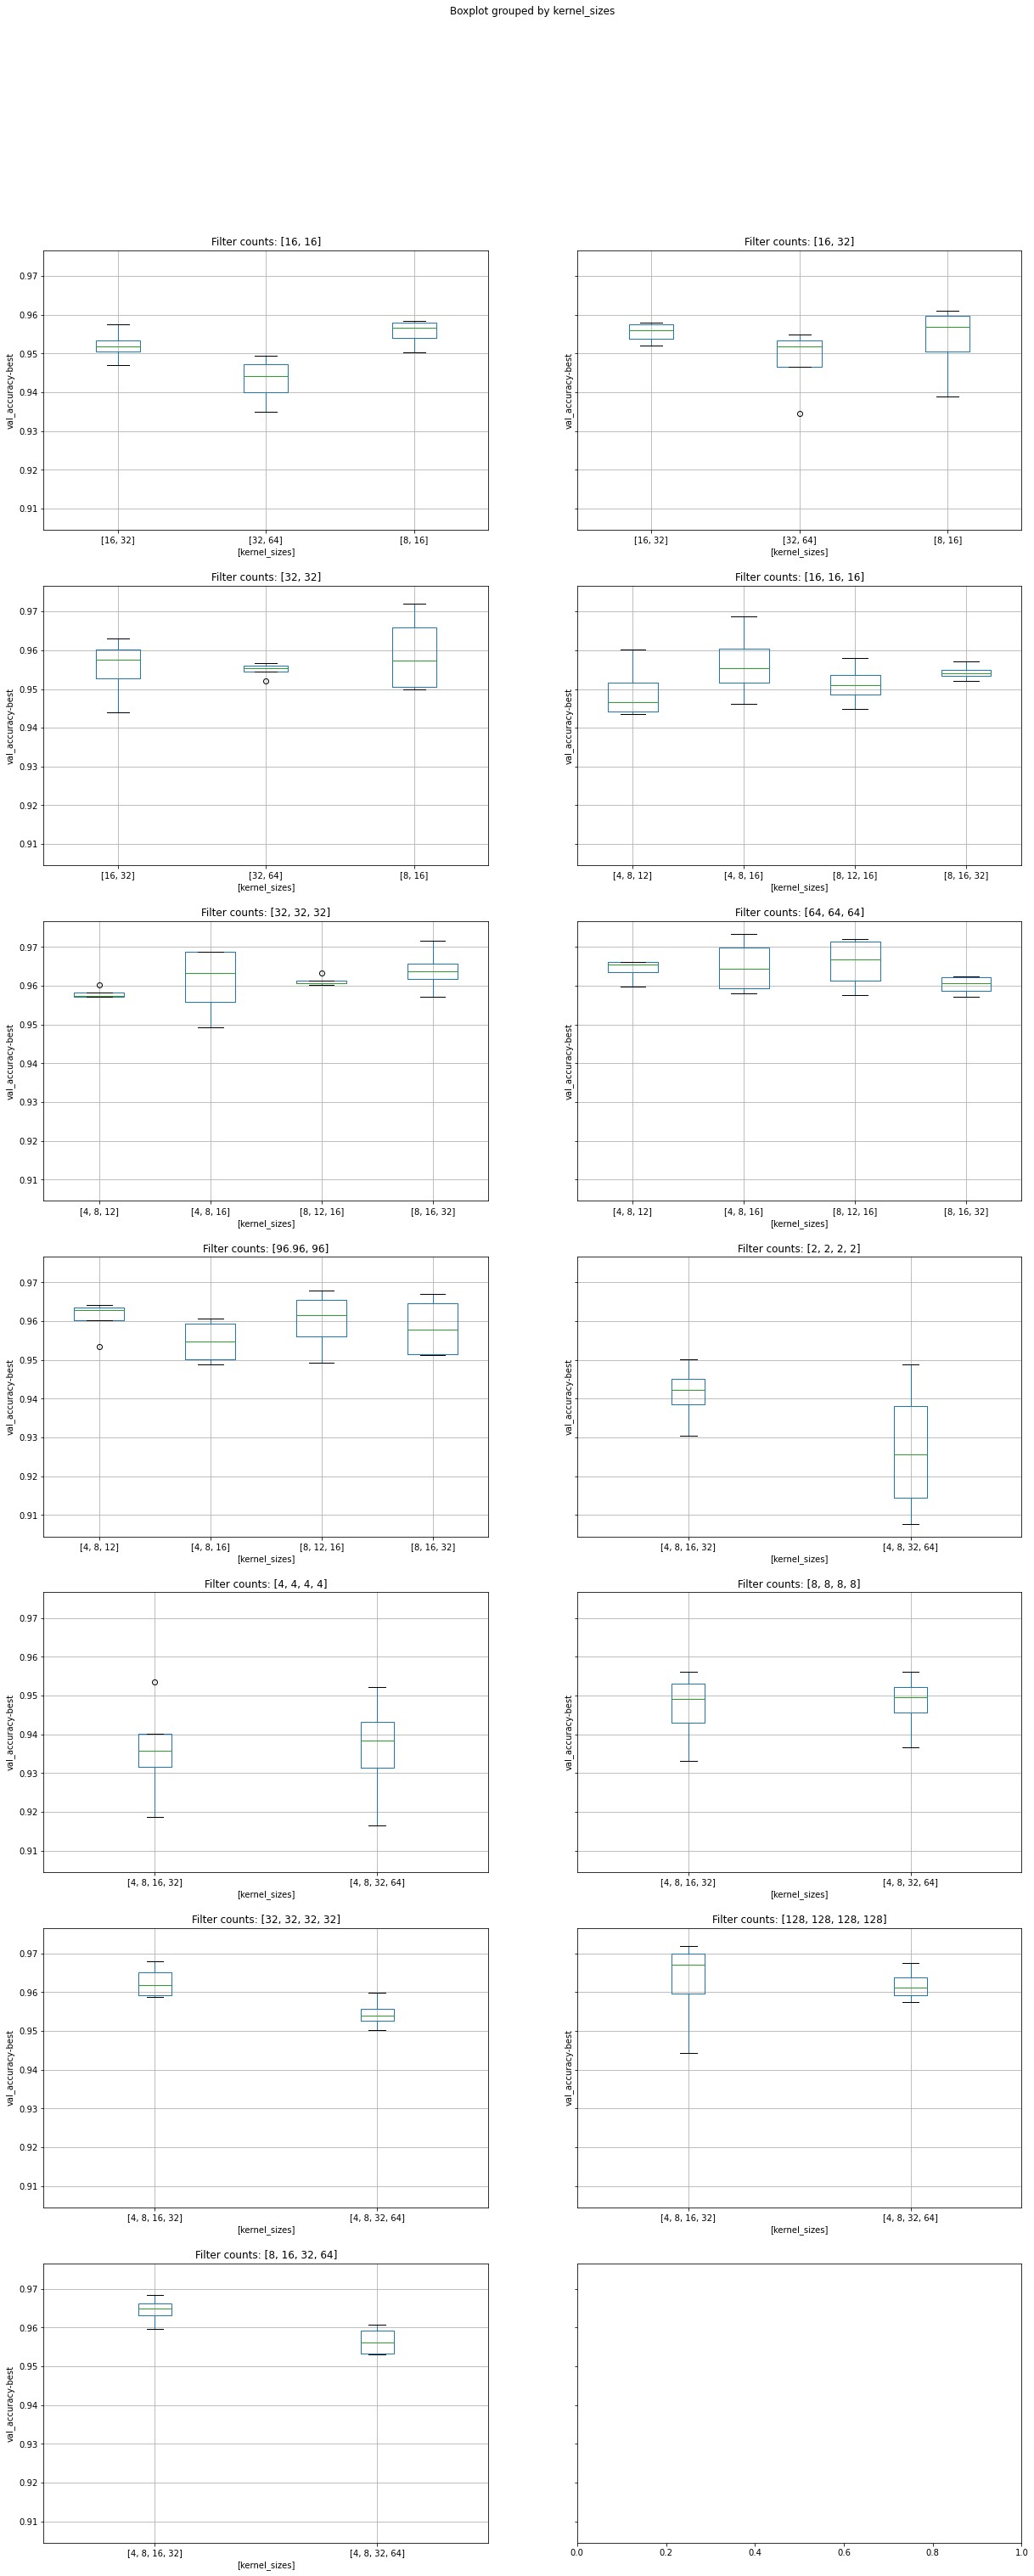

In [9]:
# look at each set of filter counts by their kernel sizes

filters = df.num_filters.unique()

# create 3-wide subplots to show
# fig, ax = plt.subplots(nrows=8, ncols=2, figsize=(20, 50), sharey=True)
fig, ax = plt.subplots(nrows=7, ncols=2, figsize=(20, 50), sharey=True)

for i in range(0,len(filters)):
      
    x = i // 2
    y = i % 2
    
    axis = ax[x,y]
    
    axis.set_ylabel("val_accuracy-best")

    # plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
    boxplot = df[df.num_filters == filters[i]].boxplot(column=["val_accuracy-best"],
                                                          by=['kernel_sizes'],
                                                          ax=axis,
                                                          figsize=(20,10))
    axis.title.set_text(f"Filter counts: {filters[i]}")


**In all of the cases we tried, the best accuracies came from the highest number of filters for each set of kernels, regardless of the kernel sizes:** ```[16,32]``` for the two-filter convolutions and ```[8,16,32]``` for the three-filter ones. We should therefore test even higher counts to see if that makes any marginal improvement, including ```[32,64]``` for the two-filter convolutions, and ```[16,32,63]``` for the three-filter ones.

**Equally, the largest filters generally produce the best results,** though there seems to be some fall off between ```[4,9,12]``` and ```[8,12,16]``` suggesting that a 4-word kernel does have value.  We should, in addition, test [4,8,16], [4,8,16,32] and other similar combinations to see if we can improve further.

## Evaluate the Dense Layers
Look at differences in the fully connected layers within the beset selections so far.

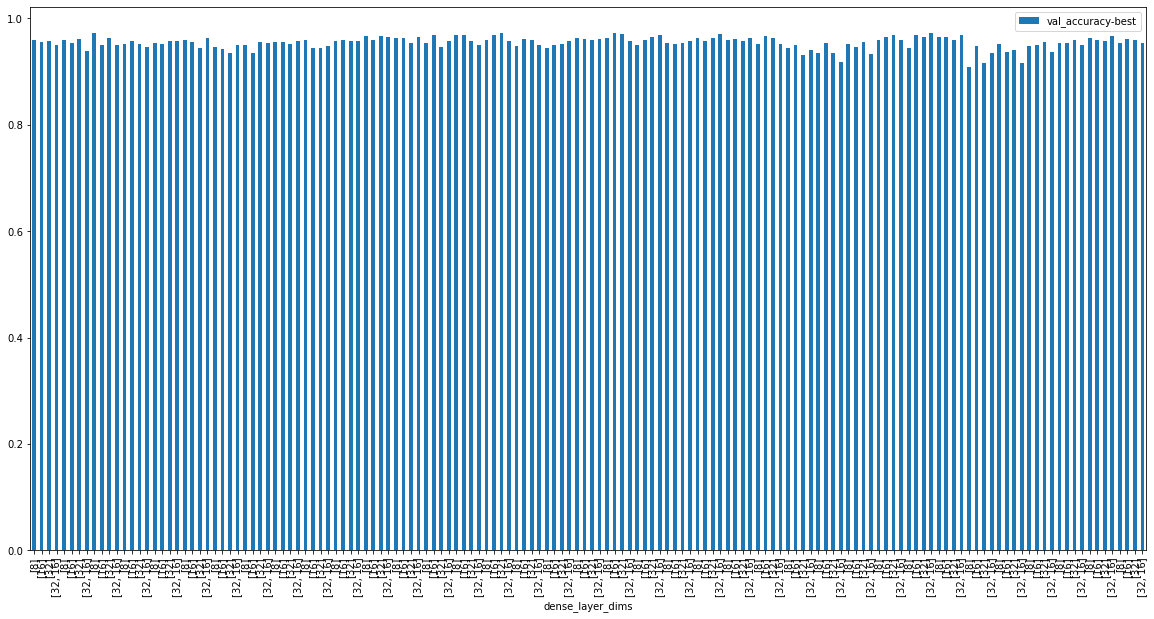

In [10]:
# look at accuracy by dense layers

boxplot = df.plot.bar(x="dense_layer_dims", y='val_accuracy-best', figsize=(20,10))



**After selecting the best from the rest of the hyperparameters, the dense layers have less of an effect (within 1% of accuracy) - a single layer of only 8 nodes appears to be sufficient to give a good result.**

As we have a relatively small data set for training - fewer than 7000 records in training, it may not be possible to effectively converge on larger dense-layer models.

We also may want to look at f1 instead of accuracy to be certain??

Round 1 testing was for 8280 tests with different hyperparameters in a total run time of 49h40m for an average of 1 test every 21.6s


In [11]:
best_test = df3[ df3["dense_layer_dims"] == "[8]"].to_dict(orient='records')[0]


NameError: name 'df3' is not defined

In [ ]:
## print out best version:

print(f"Best validation accuracy in first hyperparameter tuning run is {best_test['val_accuracy-best']:5f}, in epoch {best_test['val_accuracy-epoch']},  Run at: {best_test['timestamp']}")

print(f"Model:  num_filters: {best_test['num_filters']}, kernel_sizes: {best_test['kernel_sizes']},  dense_layer_dims: {best_test['dense_layer_dims']},  dropout_rate: {best_test['dropout_rate']}")